# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas.   You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any LGA over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the sports vouchers data
sa_vouchers = pd.read_csv("files/sportsvouchersclaimed.csv")
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


In [3]:
sa_vouchers.shape

(127526, 13)

In [4]:
sa_vouchers=sa_vouchers.drop_duplicates(subset=['Participant_ID'])
sa_vouchers.shape

(82469, 13)

In [5]:
sa_vouchers.isnull().sum()

Participant_ID                   0
Participant_Suburb               0
Club_Previous_Member             0
Participant_ATSI_Indicator       0
Participant_CALD_Indicator       0
Participant_Sex                  0
Voucher_Value                    0
Club_Name                        0
Voucher_Sport                    0
Participant_LGA                  0
Participant_Electorate           0
Voucher_Completion_Date       1303
Voucher_Claim_Year               0
dtype: int64

**The only column contains NaN is voucher_completion_date, which doesn't affect our research that much, so I decide to just keep it.**

## Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out?


In [6]:
count_sport=sa_vouchers[['Voucher_Sport','Participant_ID']].groupby(by='Voucher_Sport').count()
#the column count_sport shows the popularity of different sports.
#change column name. 
count_sport.columns=['count_sport'] 
count_sport=count_sport.sort_values(by=['count_sport'],ascending=False)
count_sport.head(10)

,count_sport
Voucher_Sport,
Australian Rules,30507
Netball,14440
Football (Soccer),10241
Gymnastics,6498
Basketball,3972
Athletics,3168
Tennis,2639
Hockey,1880
Calisthenics,1513


In [7]:
count_LGA=sa_vouchers[['Participant_LGA','Participant_ID']].groupby(by='Participant_LGA').count()
#change column name. how many people use vouchers in each LGA.
count_LGA.columns=['count_LGA'] 
count_LGA=count_LGA.sort_values(by=['count_LGA'],ascending=False)
count_LGA.head(10)

,count_LGA
Participant_LGA,
ONKAPARINGA,8140
SALISBURY,5246
CHARLES STURT,4640
TEA TREE GULLY,4599
PLAYFORD,4518
PORT ADELAIDE ENFIELD,4503
MARION,3457
MITCHAM,3178
ADELAIDE HILLS,3091


## Are some sports more popular in different parts of the state?

Since there are too many LGA and sports, I'm going to focus on the top10 vouchers-most-used LGA, and find out what is the most popular sport in those LGAs.


In [8]:
key_info=sa_vouchers[['Voucher_Sport','Participant_LGA','Participant_ID']]
key_info=key_info.groupby(['Participant_LGA','Voucher_Sport']).count()
key_info=key_info.reset_index()
#select top 10 pupolar sports to make plot more clear
key_info=key_info[key_info.Voucher_Sport.isin(['Australian Rules','Netball','Football (Soccer)',
                                               'Basketball','Athletics','Tennis','Hockey','Calisthenics','Cricket'])]

key_info.head()

,Participant_LGA,Voucher_Sport,Participant_ID
0,ADELAIDE,Athletics,13
1,ADELAIDE,Australian Rules,104
3,ADELAIDE,Basketball,3
4,ADELAIDE,Calisthenics,1
5,ADELAIDE,Cricket,2


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

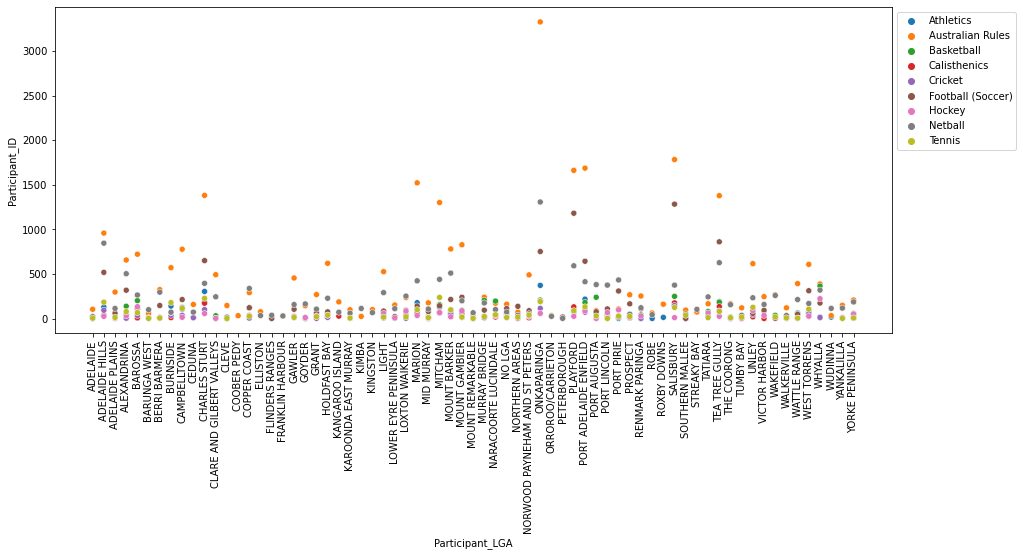

In [9]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=key_info,x='Participant_LGA',y='Participant_ID',hue='Voucher_Sport')

plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.xticks(rotation=90)


# Conclusion
**From what we can see, the top 10 outstanding sports are:**
- Australian Rules	30507
- Netball	14440
- Football (Soccer)	10241
- Gymnastics	6498
- Basketball	3972
- Athletics	3168
- Tennis	2639
- Hockey	1880
- Calisthenics	1513
- Cricket	1364

**the top 10 outstanding LGA are:**
- ONKAPARINGA	8140
- SALISBURY	5246
- CHARLES STURT	4640
- TEA TREE GULLY	4599
- PLAYFORD	4518
- PORT ADELAIDE ENFIELD	4503
- MARION	3457
- MITCHAM	3178
- ADELAIDE HILLS	3091
- MOUNT BARKER	2174
### Yes, some sports more popular in different parts of the state.
Even though Australian Rules is the most popular sport in many states, but still, from the plot above we can see some sports are more poular in different parts of the state. for example:
- in NORNTHERN AREA, football is the most popular sports
- in NARACOORTE LUCINDALE, basketball is the most popular sports
- in ADELAIDE HILLS, netball is the 2ed most popular sports. But in CHARLES STURT,football is the 2ed most popular sports


The SEIFA data includes row for each Local Government Area (LGA) but the names of the LGAs have a letter or letters in brackets after the name.  To allow us to match this up with the voucher data we remove this and convert to uppercase. 

For each LGA the data includes a number of measures all of which could be useful in your exploration.  

In [10]:
# read the SEIFA data, create an LGA column by removing the letters in brackets and converting to uppercase
seifa = pd.read_csv('files/ABS_SEIFA_LGA.csv')
seifa.head()

,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985


In [11]:
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
#replace (xxx) to empty
seifa['LGA'] = lga
seifa.head()

<ipython-input-11-7156453d617e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()


,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ


In [12]:
seifa.value_counts('Index Type')

Index Type
Index of Economic Resources                                    2256
Index of Education and Occupation                              2256
Index of Relative Socio-economic Advantage and Disadvantage    2256
Index of Relative Socio-economic Disadvantage                  2256
dtype: int64

Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

**review melt data, and this process is unmelt data**

In [13]:
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()


INDEX_TYPE,IEO,IER,IRSAD,IRSD
LGA,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0
ALBANY,999.0,999.0,977.0,987.0
ALBURY,964.0,964.0,967.0,979.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0


In [14]:
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_pop.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD
LGA,,,,
ADELAIDE,19606.0,19606.0,19606.0,19606.0
ADELAIDE HILLS,38601.0,38601.0,38601.0,38601.0
ALBANY,33614.0,33614.0,33614.0,33614.0
ALBURY,47851.0,47851.0,47851.0,47851.0
ALEXANDRINA,23693.0,23693.0,23693.0,23693.0


In [15]:
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0,19606.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0,38601.0
ALBANY,999.0,999.0,977.0,987.0,33614.0
ALBURY,964.0,964.0,967.0,979.0,47851.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0,23693.0


This data frame can then be joined with the vouchers data frame to create one master data frame containing both the voucher data and the SEIFA measures.

In [16]:
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0
5,1000007,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Southern Tigers Basketball Association,Basketball,ONKAPARINGA,FISHER,28/5/15 23:09,2015,996.0,996.0,975.0,993.0,159517.0
7,1000008,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Woods Panthers Netball Club,Netball,ONKAPARINGA,FISHER,19/5/16 1:55,2016,996.0,996.0,975.0,993.0,159517.0


## Are any LGAs over/under represented in their use of vouchers?

I need to find out how many voucher use per person.

In [17]:
#I can use the count_LGA frame I created before.
count_LGA.head()

,count_LGA
Participant_LGA,
ONKAPARINGA,8140
SALISBURY,5246
CHARLES STURT,4640
TEA TREE GULLY,4599
PLAYFORD,4518


In [18]:
new_countLGA=count_LGA.join(LGA_scores,on='Participant_LGA')
new_countLGA['voucher_perperson']=new_countLGA.count_LGA/new_countLGA.Population
new_countLGA=new_countLGA.sort_values(by='voucher_perperson',ascending=False)
new_countLGA.shape

(69, 7)

In [19]:
new_countLGA=new_countLGA.dropna()
new_countLGA.shape

(62, 7)

In [20]:
new_countLGA.head()

,count_LGA,IEO,IER,IRSAD,IRSD,Population,voucher_perperson
Participant_LGA,,,,,,,
KAROONDA EAST MURRAY,234,999.0,999.0,972.0,986.0,1035.0,0.226087
WUDINNA,163,1008.0,1008.0,999.0,1023.0,1256.0,0.129777
CLEVE,221,1021.0,1021.0,995.0,1018.0,1729.0,0.127820
KIMBA,137,1038.0,1038.0,1019.0,1045.0,1087.0,0.126035
ELLISTON,109,978.0,978.0,978.0,991.0,1045.0,0.104306


In [21]:
new_countLGA.voucher_perperson.describe()

count    62.000000
mean      0.065889
std       0.033662
min       0.002293
25%       0.044265
50%       0.067928
75%       0.080290
max       0.226087
Name: voucher_perperson, dtype: float64

In [22]:
new_countLGA['over_represented']=new_countLGA.voucher_perperson>0.065889
new_countLGA.head()

,count_LGA,IEO,IER,IRSAD,IRSD,Population,voucher_perperson,over_represented
Participant_LGA,,,,,,,,
KAROONDA EAST MURRAY,234,999.0,999.0,972.0,986.0,1035.0,0.226087,True
WUDINNA,163,1008.0,1008.0,999.0,1023.0,1256.0,0.129777,True
CLEVE,221,1021.0,1021.0,995.0,1018.0,1729.0,0.127820,True
KIMBA,137,1038.0,1038.0,1019.0,1045.0,1087.0,0.126035,True
ELLISTON,109,978.0,978.0,978.0,991.0,1045.0,0.104306,True


In [23]:
new_countLGA.tail()

,count_LGA,IEO,IER,IRSAD,IRSD,Population,voucher_perperson,over_represented
Participant_LGA,,,,,,,,
COOBER PEDY,32,870.0,870.0,869.0,870.0,1694.0,0.018890,False
CAMPBELLTOWN,1732,979.5,979.5,973.0,978.0,97060.0,0.017845,False
PETERBOROUGH,29,873.0,873.0,808.0,798.0,1733.0,0.016734,False
ADELAIDE,242,874.0,874.0,1036.0,1013.0,19606.0,0.012343,False
KINGSTON,166,1005.0,1005.0,994.5,1006.5,72380.5,0.002293,False


In [24]:
new_countLGA.over_represented.value_counts()

True     32
False    30
Name: over_represented, dtype: int64

## Conclusion
- There are about 6 or 7 people use voucher per 100 people
- KAROONDA EAST MURRAY	has the highist level of voucher use, nearly 23 people use voucher per 100, 
    which followed by WUDINNA and CLEVE.
- KINGSTON has the lowest level of voucher use, nearly 2 people use voucher per 1000,
    which followed by ADELAIDE and PETERBOROUGH.
- If we use mean value as a hurdle,32 LGAs are over represented and 30 LGAs are under represented.

## Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

In [25]:
#I can use the new_countLGA frame I created before.
new_countLGA.head()

,count_LGA,IEO,IER,IRSAD,IRSD,Population,voucher_perperson,over_represented
Participant_LGA,,,,,,,,
KAROONDA EAST MURRAY,234,999.0,999.0,972.0,986.0,1035.0,0.226087,True
WUDINNA,163,1008.0,1008.0,999.0,1023.0,1256.0,0.129777,True
CLEVE,221,1021.0,1021.0,995.0,1018.0,1729.0,0.127820,True
KIMBA,137,1038.0,1038.0,1019.0,1045.0,1087.0,0.126035,True
ELLISTON,109,978.0,978.0,978.0,991.0,1045.0,0.104306,True


In [26]:
new_countLGA.corr()

,count_LGA,IEO,IER,IRSAD,IRSD,Population,voucher_perperson,over_represented
count_LGA,1.000000,0.005533,0.005533,0.062828,0.039966,0.919108,-0.236252,-0.370662
IEO,0.005533,1.000000,1.000000,0.781360,0.848105,-0.035736,0.291479,0.284622
IER,0.005533,1.000000,1.000000,0.781360,0.848105,-0.035736,0.291479,0.284622
IRSAD,0.062828,0.781360,0.781360,1.000000,0.985054,0.092233,0.008544,-0.023387
IRSD,0.039966,0.848105,0.848105,0.985054,1.000000,0.055094,0.100110,0.071972
Population,0.919108,-0.035736,-0.035736,0.092233,0.055094,1.000000,-0.400623,-0.508054
voucher_perperson,-0.236252,0.291479,0.291479,0.008544,0.100110,-0.400623,1.000000,0.704977
over_represented,-0.370662,0.284622,0.284622,-0.023387,0.071972,-0.508054,0.704977,1.000000


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


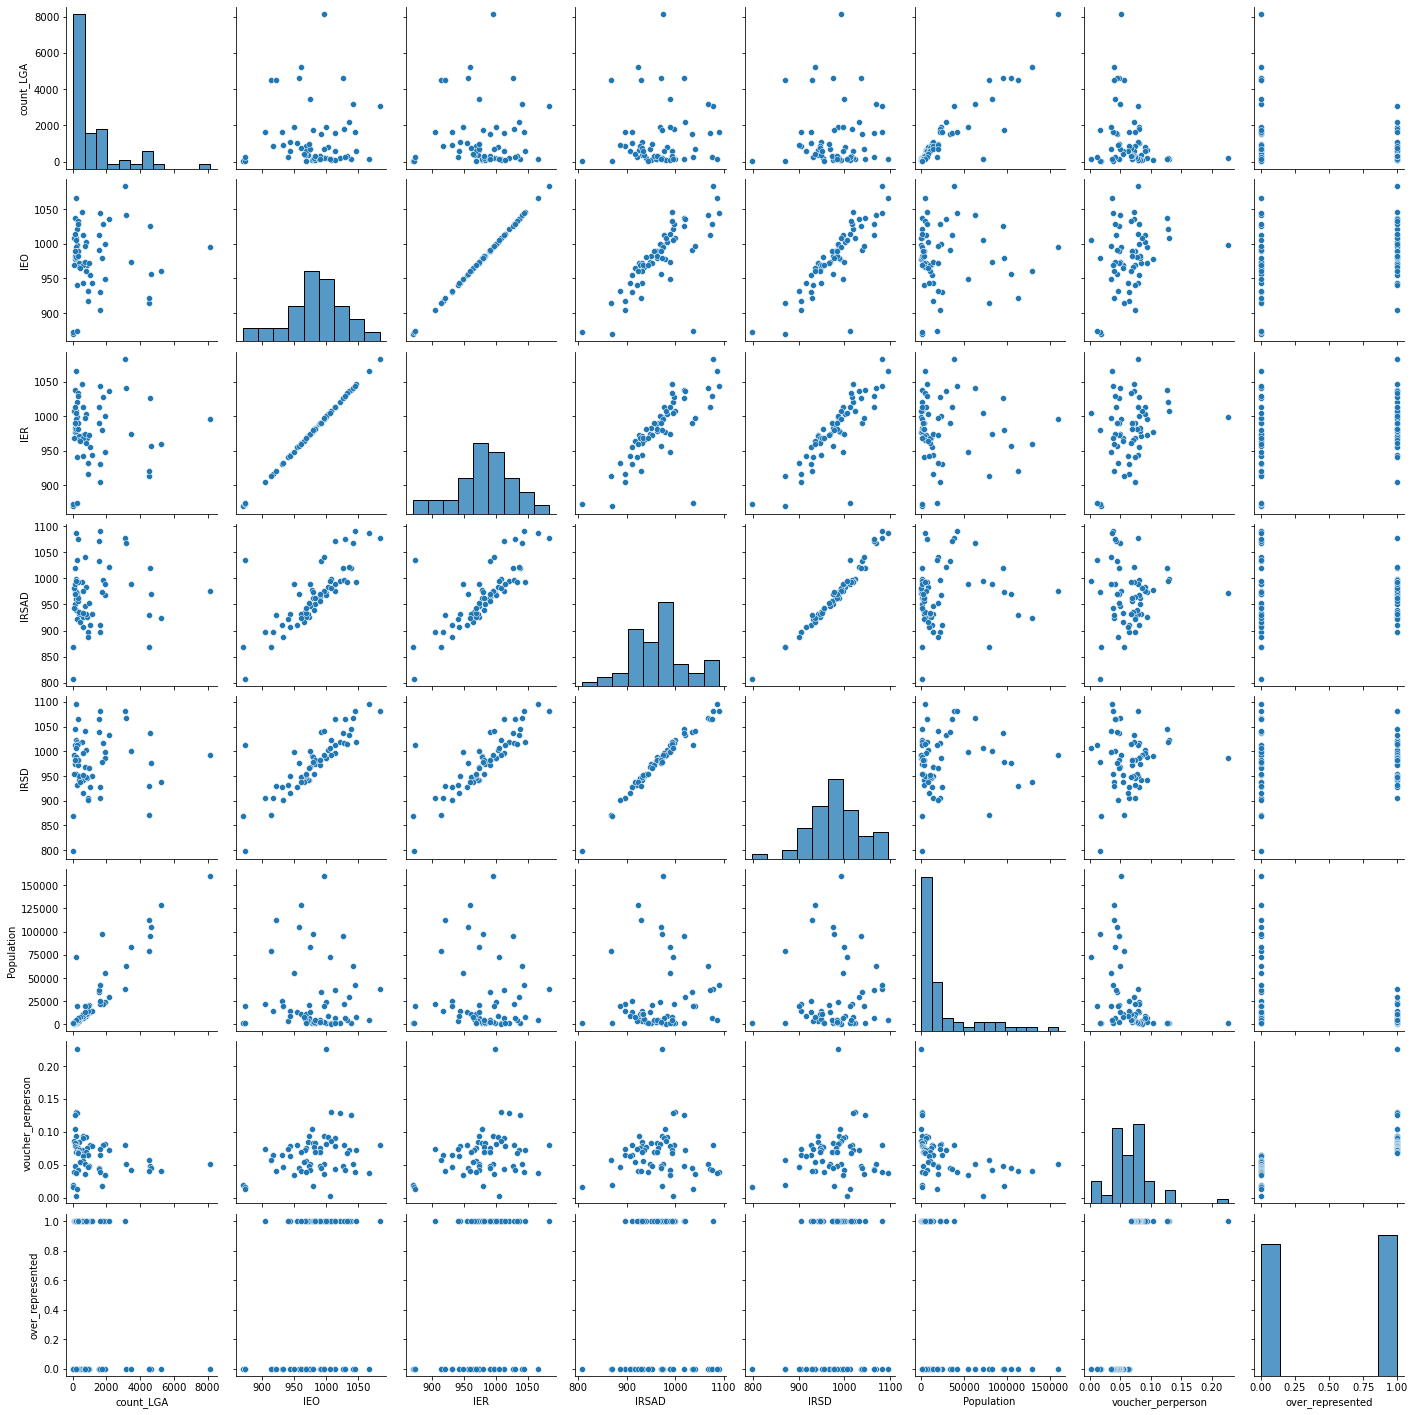

In [27]:
sns.pairplot(new_countLGA)

## Conclusion
- population index and voucher use in an LGA have a positive linear relationship. 
- other 4 indexs(IEO, IER, IRSAD, IRSD)does not have relationship with the voucher use in an LGA,
    which means the socio-economic facor does not affect voucher use.
- But the 4 indexs(IEO, IER, IRSAD, IRSD) have a strong posivitve linear relationship in between, especially IER and IEO.

## Challenge - Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

In [28]:
qld_vouchers = pd.read_csv('files/round1-redeemed_get_started_vouchers.csv')
qld_vouchers.head()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00


In [29]:
# Join the QLD data with the LGA data as before to get population and SIEFA data integrated
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()
qld_vouchers_scores = qld_vouchers.join(LGA_scores, on='LGA')
qld_vouchers_scores.tail()

<ipython-input-29-e6ec1400f4bb>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()


,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,IEO,IER,IRSAD,IRSD,Population
9502,2000006794,6NNE0C7G,5,NaN,No,Zen Do Kai Martial Arts,Queensland Police Citizens Youth Welfare Assoc...,Hervey Bay,Fraser Coast (R),Hervey Bay,Point Vernon,150.0,FRASER COAST,947.0,947.0,908.0,917.0,95348.0
9503,2000006793,RTO92U6N,6,NaN,No,Zen Do Kai Martial Arts,Queensland Police Citizens Youth Welfare Assoc...,Hervey Bay,Fraser Coast (R),Hervey Bay,Point Vernon,150.0,FRASER COAST,947.0,947.0,908.0,917.0,95348.0
9504,2000006797,X77J5N6X,13,NaN,No,Zen Do Kai Martial Arts,Queensland Police Citizens Youth Welfare Assoc...,Hervey Bay,Fraser Coast (R),Hervey Bay,Point Vernon,150.0,FRASER COAST,947.0,947.0,908.0,917.0,95348.0
9505,2000006810,Y2U1FBEF,15,NaN,No,Zen Do Kai Martial Arts,Queensland Police Citizens Youth Welfare Assoc...,Hervey Bay,Fraser Coast (R),Hervey Bay,Point Vernon,150.0,FRASER COAST,947.0,947.0,908.0,917.0,95348.0
9506,2000006811,HXH2CHU2,16,NaN,No,Zen Do Kai Martial Arts,Queensland Police Citizens Youth Welfare Assoc...,Hervey Bay,Fraser Coast (R),Hervey Bay,Point Vernon,150.0,FRASER COAST,947.0,947.0,908.0,917.0,95348.0


## Make the sports name uniform

In [31]:
qld=pd.unique(qld_vouchers_scores['Participation Activity'])
sa=pd.unique(sa_vouchers.Voucher_Sport)

In [32]:
diff1=set(qld).difference(sa)
diff1

{'*Other',
 'Australian Football',
 'BMX Bicycle Motocross',
 'Body Boarding',
 'Bowls Lawn',
 'Boxing',
 'Broomball',
 'Bushwalking',
 'Canoeing Outrigger',
 'Cheerleading',
 'Disability Sports',
 'Dragon Boating',
 'Futsal',
 'Ice Hockey',
 'Inline Hockey',
 'Karting',
 'Kayaking',
 'Life Saving Surf',
 'Mixed Martial Arts',
 'Motor Cycling',
 'Oztag',
 'Parkour',
 'Polocrosse',
 'Pony Club',
 'Riding for the Disabled',
 'Rock Climbing',
 'Skipping',
 'Surfing',
 'Swimming Synchronised',
 'T-Ball',
 'Tenpin Bowling',
 'Trail Bike Riding',
 'Trampolining',
 'Zen Do Kai Martial Arts'}

In [33]:
diff2=set(sa).difference(qld)
diff2

{'Australian Rules',
 'BMX',
 'Badminton',
 'Bowls',
 'Diving',
 'Fencing',
 'Kung Fu (Wu Shu)',
 'Lacrosse',
 'Motor Sport',
 'Motorcycling',
 'Orienteering',
 'Paralympics',
 'Pony Clubs',
 'Surf Lifesaving',
 'Surf Riding',
 'Volleyball',
 'Water Polo',
 'Wrestling'}

Well, Since I'm not very fimiliar with those sports name, I match as much as I can.
- Australian Football>>Australian Rules
- BMX Bicycle Motocross>>BMX
- Bowls Lawn>>Bowls
- Life Saving Surf>>Surf Lifesaving
- Motor Cycling>>Motorcycling
- Surfing>>Surf Riding
- Pony Club>>Pony Clubs


In [34]:
qld_vouchers_scores=qld_vouchers_scores.replace(['Australian Football','BMX Bicycle Motocross','Bowls Lawn','Life Saving Surf','Motor Cycling','Surfing','Pony Club'],
                            ['Australian Rules','BMX','Bowls','Surf Lifesaving','Motorcycling','Surf Riding','Pony Clubs'])


In [35]:
qld_vouchers_scores.tail()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,IEO,IER,IRSAD,IRSD,Population
9502,2000006794,6NNE0C7G,5,NaN,No,Zen Do Kai Martial Arts,Queensland Police Citizens Youth Welfare Assoc...,Hervey Bay,Fraser Coast (R),Hervey Bay,Point Vernon,150.0,FRASER COAST,947.0,947.0,908.0,917.0,95348.0
9503,2000006793,RTO92U6N,6,NaN,No,Zen Do Kai Martial Arts,Queensland Police Citizens Youth Welfare Assoc...,Hervey Bay,Fraser Coast (R),Hervey Bay,Point Vernon,150.0,FRASER COAST,947.0,947.0,908.0,917.0,95348.0
9504,2000006797,X77J5N6X,13,NaN,No,Zen Do Kai Martial Arts,Queensland Police Citizens Youth Welfare Assoc...,Hervey Bay,Fraser Coast (R),Hervey Bay,Point Vernon,150.0,FRASER COAST,947.0,947.0,908.0,917.0,95348.0
9505,2000006810,Y2U1FBEF,15,NaN,No,Zen Do Kai Martial Arts,Queensland Police Citizens Youth Welfare Assoc...,Hervey Bay,Fraser Coast (R),Hervey Bay,Point Vernon,150.0,FRASER COAST,947.0,947.0,908.0,917.0,95348.0
9506,2000006811,HXH2CHU2,16,NaN,No,Zen Do Kai Martial Arts,Queensland Police Citizens Youth Welfare Assoc...,Hervey Bay,Fraser Coast (R),Hervey Bay,Point Vernon,150.0,FRASER COAST,947.0,947.0,908.0,917.0,95348.0


## Top 10 popular sports in Queensland(distribution in LGAs)

In [36]:
count_sport=qld_vouchers_scores[['Participation Activity','Application Number']].groupby(by='Participation Activity').count()
count_sport.columns=['count_sport'] 
count_sport=count_sport.sort_values(by=['count_sport'],ascending=False)
count_sport.head(10)

,count_sport
Participation Activity,
Rugby League,2782
Football (Soccer),2074
Netball,1263
Australian Rules,548
Gymnastics,539
Basketball,376
Rugby Union,342
Hockey,271
Swimming,157


In [41]:
qldkey_info=qld_vouchers_scores[['Participation Activity','LGA','Application Number']]
qldkey_info=qldkey_info.groupby(['LGA','Participation Activity']).count()
qldkey_info=qldkey_info.reset_index()
#select top 10 pupolar sports to make plot more clear
qldkey_info=qldkey_info[qldkey_info['Participation Activity'].isin(['Rugby League','Football (Soccer)','Netball',
                                               'Australian Rules','Gymnastics','Basketball','Rugby Union',
                                                        'Hockey','Swimming','Pony Clubs'])]

qldkey_info.head()

,LGA,Participation Activity,Application Number
1,BANANA (S),Football (Soccer),1
2,BANANA (S),Netball,1
4,BLACKALL TAMBO,Rugby League,1
7,BRISBANE,Australian Rules,68
10,BRISBANE,Basketball,78


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

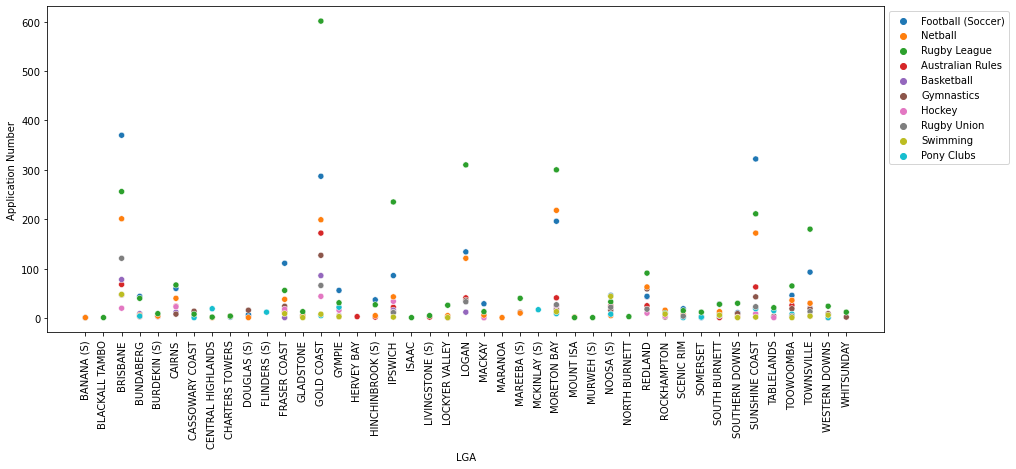

In [42]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=qldkey_info,x='LGA',y='Application Number',hue='Participation Activity')

plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.xticks(rotation=90)

## Over or under represented? in QLD

In [43]:
qldcount_LGA=qld_vouchers_scores[['LGA','Application Number']].groupby(by='LGA').count()

qldcount_LGA.columns=['qldcount_LGA'] 
qldcount_LGA=qldcount_LGA.sort_values(by=['qldcount_LGA'],ascending=False)
qldcount_LGA.head(10)

,qldcount_LGA
LGA,
GOLD COAST,1700
BRISBANE,1425
SUNSHINE COAST,974
MORETON BAY,938
LOGAN,805
IPSWICH,483
TOWNSVILLE,441
REDLAND,384
FRASER COAST,320


In [50]:
qldnew_countLGA=qldcount_LGA.join(LGA_scores,on='LGA')
qldnew_countLGA['voucher_perperson']=qldnew_countLGA.qldcount_LGA/qldnew_countLGA.Population
qldnew_countLGA=qldnew_countLGA.sort_values(by='voucher_perperson',ascending=False)
qldnew_countLGA.head()

,qldcount_LGA,IEO,IER,IRSAD,IRSD,Population,voucher_perperson
LGA,,,,,,,
GYMPIE,193,962.0,962.0,916.0,929.0,45749.0,0.004219
SOUTH BURNETT,107,960.0,960.0,914.0,924.0,31006.0,0.003451
GOLD COAST,1700,1008.0,1008.0,1016.0,1014.0,494591.0,0.003437
FRASER COAST,320,947.0,947.0,908.0,917.0,95348.0,0.003356
SUNSHINE COAST,974,1007.0,1007.0,1001.0,1007.0,306889.0,0.003174


In [52]:
qldnew_countLGA.voucher_perperson.describe()

count    33.000000
mean      0.001669
std       0.001129
min       0.000044
25%       0.000649
50%       0.001510
75%       0.002528
max       0.004219
Name: voucher_perperson, dtype: float64

## Conclusion
- Compared with South Australia, QLD's voucher use is at low level(0.001669 VS 0.065889 on average per person)
- The most popular sports are different in QLD as well, the top 5 popular sports are:
    - Rugby League	2782
    - Football (Soccer)	2074
    - Netball	1263
    - Australian Rules	548
    - Gymnastics	539